#      Univariate Linear Regression in Python

# ( Hồi quy tuyến tính đơn biến trong Python )

In [ ]:
Lấy 'lstat' làm biến độc lập và 'medv' làm biến phụ thuộc hoặc Sử dụng 'lstat' 
làm công cụ dự đoán và 'medv' làm phản hồi:

In [1]:
# Step 1: Initialize the Boston dataset
#         (Khởi tạo bộ dữ liệu Boston)
import pandas as pd
data = pd.read_csv('boston.csv', header=0, delimiter=',', encoding='utf-8')
data.rename(columns={'CRIM':'crim','ZN':'zn','INDUS':'indus', 'CHAS':'chas','NOX':'nox','RM':'rm','AGE':'age','DIS':'dis','RAD':'rad','TAX':'tax','PTRATIO':'ptratio','B':'black','LSTAT':'lstat','MEDV':'medv'},
          inplace=True)
# Step 2: Examine dataset dimensions
#         ( Kiểm tra kích thước tập dữ liệu)    
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [2]:
# Step 3: Preview predictor and response variables
#         (Xem trước các biến dự đoán và phản hồi)
data_ = data.loc[:,['lstat','medv']]
data_.head(5)

,lstat,medv
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


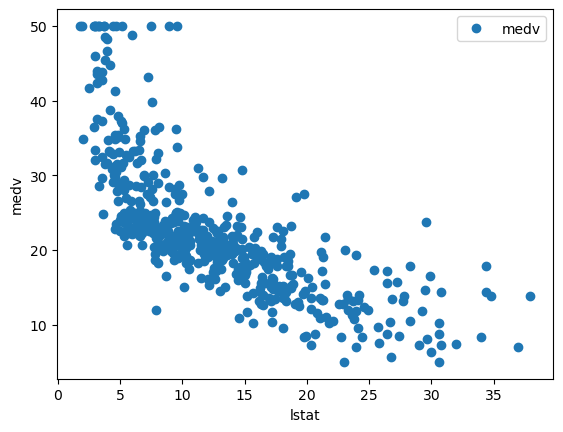

In [3]:
# Step 4: Visualize variable trends
#         (Trực quan hóa các xu hướng thay đổi)
import matplotlib.pyplot as plt
data.plot(x='lstat',y='medv',style='o')
plt.xlabel('lstat')
plt.ylabel('medv')
plt.show()

In [4]:
# Step 5: Segregate data into predictors and responses
#         (Phân tách dữ liệu thành yếu tố dự đoán và phản hồi)
X = pd.DataFrame(data['lstat'])
y = pd.DataFrame(data['medv'])

In [5]:
# Step 6: Partition data for training and testing
#         (Phân vùng dữ liệu để huấn luyện và kiểm tra)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [6]:
# Step 7: Review dimensions of training and test datasets
#         (Xem xét kích thước của tập dữ liệu huấn luyện và kiểm tra)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


In [7]:
# Step 8: Start the model training
#         (Bắt đầu đào tạo mô hình)
from sklearn.linear_model import LinearRegression
regressior = LinearRegression()
regressior.fit(X_train, y_train)

LinearRegression()

In [8]:
# Step 9: Extract the y-intercept
#         (Trích xuất phần chặn Y)
print(regressior.intercept_)

[34.33497839]


In [9]:
# Step 10: Extract the regression coefficient
#          (Trích xuất hệ số hồi quy)
print(regressior.coef_)

[[-0.92441715]]


In [16]:
# Step 11: Extract the regression coefficient
#          (Tạo dự đoán)

y_pred = regressior.predict(X_test)
y_pred

array([[27.37411725],
       [27.69766325],
       [16.95593597],
       [26.84719947],
       [24.91516763],
       [24.05545968],
       [29.99021779],
       [22.28057875],
       [17.76942306],
       [26.1908633 ],
       [27.17998965],
       [30.07341533],
       [21.75366098],
       [24.86894677],
       [23.50080939],
       [23.12179836],
       [12.85152382],
       [30.05492699],
       [27.46655897],
       [ 7.03693995],
       [23.70418116],
       [18.94343284],
       [25.75638724],
       [28.67754543],
       [30.0179503 ],
       [11.7884441 ],
       [15.53233356],
       [24.6008658 ],
       [27.62370988],
       [15.06088081],
       [29.25992824],
       [17.2702378 ],
       [31.672657  ],
       [19.13756044],
       [25.9320265 ],
       [21.77214932],
       [17.88959729],
       [29.40783498],
       [12.75908211],
       [20.48720948],
       [27.54975651],
       [28.09516263],
       [27.30940805],
       [12.05652507],
       [17.66773717],
       [13

In [11]:
Step 12: Compare with actual values
        (So sánh với giá trị thuật tế)
y_test

,medv
307,28.2
343,23.9
47,16.6
67,22.0
362,20.8
...,...
92,22.9
224,44.8
110,21.7
426,10.2


In [14]:
Step 13: Assess model performance
         (Đánh giá hiệu quả mô hình)
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 5.078127727696937
Mean Squared Error: 46.994820919547124
Root Mean Squared Error: 6.855276866731724


#   Multivariate Linear Regression in Python

#  ( Hồi quy tuyến tính đa biến trong Python )

In [19]:
# Step 1: Initialize the Boston dataset
#         (Khởi tạo bộ dữ liệu Boston)
import pandas as pd
dataset = pd.read_csv('boston.csv', header=0, delimiter=',', encoding='utf-8')
dataset.rename(columns={'CRIM':'crim','ZN':'zn','INDUS':'indus', 'CHAS':'chas','NOX':'nox','RM':'rm','AGE':'age','DIS':'dis','RAD':'rad','TAX':'tax','PTRATIO':'ptratio','B':'black','LSTAT':'lstat','MEDV':'medv'},
          inplace=True)
dataset

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [21]:
#Step 2: Define response and predictor variables
#        ( Xác định các biến phản ứng và dự đoán )
X = pd.DataFrame(dataset.iloc[:,:-1])
y = pd.DataFrame(dataset.iloc[:,-1])

In [22]:
# Step 3: Preview predictor variables
#         (Xem trước các biến dự đoán)
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [23]:
# Step 4: Preview response variable
#         (Xem trước biến phản hồi)
y

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [24]:
# Step 5: Partition data for training and testing
#         ( Phân vùng dữ liệu để huấn luyện và kiểm tra )
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [25]:
# Step 6: Review dimensions of training and test datasets
#         ( Xem lại kích thước của tập dữ liệu huấn luyện và kiểm tra )
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404, 1)
(102, 1)


In [26]:
# Step 7: Commence model training
#         (Bắt đầu huấn luyện mô hình)
from sklearn.linear_model import LinearRegression
regressior = LinearRegression()
regressior.fit(X_train, y_train)

LinearRegression()

In [28]:
# Step 8: Examine chosen model coefficients
#         ( Tương phản dự đoán với giá trị thực tế )
v = pd.DataFrame(regressior.coef_,index=['Co-efficient']).transpose()
w = pd.DataFrame(X.columns,columns=['Attribute'])

In [29]:
# Step 9: Contrast predicted with actual values
#         ( Tương phản dự đoán với giá trị thực tế )
coeff_df = pd.concat([w,v],axis=1,join='inner')
coeff_df

,Attribute,Co-efficient
0,crim,-0.130800
1,zn,0.049403
2,indus,0.001095
3,chas,2.705366
4,nox,-15.957050
5,rm,3.413973
6,age,0.001119
7,dis,-1.493081
8,rad,0.364422
9,tax,-0.013172


In [30]:
# Step 10: Comparing the predicted value to the actual value:
#          ( So sánh giá trị dự đoán với giá trị thực tế )
y_pred = regressior.predict(X_test)
y_pred = pd.DataFrame(y_pred,columns=['Predicted'])
y_pred

,Predicted
0,37.563118
1,32.144451
2,27.065736
3,5.670806
4,35.099826
...,...
97,21.912956
98,22.394774
99,13.193354
100,23.969911


In [31]:
y_test

,medv
226,37.6
292,27.9
90,22.6
373,13.8
273,35.2
...,...
349,26.6
212,22.4
156,13.1
480,23.0


In [32]:
# Step 11: Assess model performance
#          ( Đánh giá hiệu quả mô hình )
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 3.213270495842372
Mean Squared Error: 20.86929218377072
Root Mean Squared Error: 4.568292042303198
